In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
import logging

from asgardpy.analysis import AsgardpyAnalysis
from asgardpy.config import AsgardpyConfig
from asgardpy.data.target import apply_selection_mask_to_models, set_models

from gammapy.maps import Map
from gammapy.modeling.models import Models
from gammapy.modeling import Fit
from gammapy.estimators import FluxPointsEstimator
from gammapy.datasets import Datasets

In [2]:
os.environ['GAMMAPY_DATA']

'/data/magic/users-ifae/cpriyada/lst/software/gammapy-datasets/dev/'

In [3]:
log = logging.getLogger("test DL4 steps")

In [4]:
config_file = "../asgardpy/tests/config_test_base.yaml"

In [5]:
config = AsgardpyConfig()

In [6]:
%%time
config_main = config.read(config_file)

CPU times: user 34.5 ms, sys: 2.25 ms, total: 36.7 ms
Wall time: 36 ms


# Update path of test data

In [7]:
config_main.dataset3d.instruments[0].input_dl3[0].input_dir = f"{os.environ['GAMMAPY_DATA']}fermipy-crab/"
config_main.dataset3d.instruments[0].input_dl3[1].input_dir = f"{os.environ['GAMMAPY_DATA']}fermipy-crab/"
config_main.dataset1d.instruments[0].input_dl3[0].input_dir = f"{os.environ['GAMMAPY_DATA']}hess-dl3-dr1/"
config_main.dataset1d.instruments[1].input_dl3[0].input_dir = f"{os.environ['GAMMAPY_DATA']}magic/rad_max/data/"

In [8]:
for g in config_main.general:
    print(g)

('log', LogConfig(level='info', filename='', filemode='w', format='', datefmt=''))
('outdir', PosixPath('.'))
('n_jobs', 10)
('parallel_backend', <ParallelBackendEnum.multi: 'multiprocessing'>)
('steps', [<AnalysisStepEnum.datasets_3d: 'datasets-3d'>, <AnalysisStepEnum.datasets_1d: 'datasets-1d'>, <AnalysisStepEnum.fit: 'fit'>, <AnalysisStepEnum.flux_points: 'flux-points'>])
('overwrite', True)
('stacked_dataset', True)


# Steps mentioned in the main config file

In [9]:
config_main.general.steps

[<AnalysisStepEnum.datasets_3d: 'datasets-3d'>,
 <AnalysisStepEnum.datasets_1d: 'datasets-1d'>,
 <AnalysisStepEnum.fit: 'fit'>,
 <AnalysisStepEnum.flux_points: 'flux-points'>]

In [10]:
for c in config_main.target:
    print(c)

('source_name', '4FGL J0534.5+2201i')
('sky_position', SkyPositionConfig(frame=<FrameEnum.icrs: 'icrs'>, lon=<Angle 83.633 deg>, lat=<Angle 22.02 deg>, radius=<Angle 0. deg>))
('use_uniform_position', True)
('models_file', PosixPath('.'))
('add_fov_bkg_model', False)
('use_catalog', CatalogConfig(name='', selection_radius=<Angle 0. deg>, exclusion_radius=<Angle 0. deg>))
('components', [ModelComponent(name='4FGL J0534.5+2201i', type=<ModelTypeEnum.skymodel: 'SkyModel'>, datasets_names=[''], spectral=SpectralModelConfig(type='LogParabolaSpectralModel', parameters=[ModelParams(name='amplitude', value=1e-06, unit='cm-2 s-1 TeV-1', error=1.5e-07, min=1e-13, max=0.01, frozen=False), ModelParams(name='reference', value=0.01, unit='TeV', error=0.0, min=0.0001, max=100.0, frozen=True), ModelParams(name='alpha', value=1.7, unit='', error=0.1, min=0.5, max=5.0, frozen=False), ModelParams(name='beta', value=0.1, unit='', error=0.001, min=1e-06, max=1.0, frozen=False)], ebl_abs=EBLAbsorptionModel(

# Datasets informations

In [11]:
for cc in config_main.dataset3d:
    print(cc)

('type', <ReductionTypeEnum.cube: '3d'>)
('instruments', [Dataset3DBaseConfig(name='Fermi-LAT', input_dl3=[InputDL3Config(type='lat', input_dir=PosixPath('/data/magic/users-ifae/cpriyada/lst/software/gammapy-datasets/dev/fermipy-crab'), glob_pattern={'events': '*ft*.fits*', 'edisp': 'drm*.fits*', 'xml_model': 'srcmdl*.xml', 'exposure': 'bexpmap*.fits*', 'psf': 'psf*.fits*'}), InputDL3Config(type='lat-aux', input_dir=PosixPath('/data/magic/users-ifae/cpriyada/lst/software/gammapy-datasets/dev/fermipy-crab'), glob_pattern={'gal_diffuse': 'gll_iem_v07_cutout.fits*', 'iso_diffuse': 'iso_P8R3_SOURCE_V3_*.txt'})], input_dl4=False, dataset_info=Dataset3DInfoConfig(name='Fermi-LAT', key=['00', '01'], observation=ObservationsConfig(obs_ids=[], obs_file=PosixPath('.'), obs_time=TimeIntervalsConfig(format=<TimeFormatEnum.iso: 'iso'>, intervals=[TimeRangeConfig(start=<Time object: scale='utc' format='mjd' value=0.0>, stop=<Time object: scale='utc' format='mjd' value=0.0>)]), obs_cone=SkyPositionCo

In [12]:
for cc in config_main.dataset1d:
    print(cc)

('type', <ReductionTypeEnum.spectrum: '1d'>)
('instruments', [Dataset1DBaseConfig(name='HESS', input_dl3=[InputDL3Config(type='gadf-dl3', input_dir=PosixPath('/data/magic/users-ifae/cpriyada/lst/software/gammapy-datasets/dev/hess-dl3-dr1'), glob_pattern={'dl3': 'data/hess_*fits.gz'})], input_dl4=False, dataset_info=Dataset1DInfoConfig(name='HESS', geom=GeomConfig(wcs=WcsConfig(skydir=SkyPositionConfig(frame=<FrameEnum.icrs: 'icrs'>, lon=<Angle 0. deg>, lat=<Angle 0. deg>, radius=<Angle 0. deg>), binsize=<Angle 0.02 deg>, proj=<ProjectionEnum.tan: 'TAN'>, map_frame_shape=MapFrameShapeConfig(width=<Angle 6. deg>, height=<Angle 6. deg>), binsize_irf=<Angle 0.2 deg>), selection=SelectionConfig(offset_max=<Angle 2.5 deg>), axes=[MapAxesConfig(name='energy', axis=EnergyAxisConfig(min=<Quantity 0.1 TeV>, max=<Quantity 100. TeV>, nbins=5, per_decade=True), axis_custom=EnergyEdgesCustomConfig(edges=[], unit='TeV')), MapAxesConfig(name='energy_true', axis=EnergyAxisConfig(min=<Quantity 0.1 TeV>,

# DL4 step information

In [13]:
for cc in config_main.fit_params:
    print(cc)

('fit_range', EnergyRangeConfig(min=<Quantity 1. GeV>, max=<Quantity 40. TeV>))
('backend', <BackendEnum.minuit: 'minuit'>)
('optimize_opts', {})
('covariance_opts', {})
('confidence_opts', {})
('store_trace', True)


In [14]:
for cc in config_main.flux_points_params:
    print(cc)

('parameters', {'selection_optional': 'all'})
('reoptimize', False)


In [15]:
%%time
analysis = AsgardpyAnalysis(config_main)

Setting logging config: {'level': 'INFO', 'filename': '', 'filemode': 'w', 'format': '', 'datefmt': ''}


CPU times: user 1.32 ms, sys: 89 µs, total: 1.41 ms
Wall time: 1.17 ms


In [16]:
analysis

# Prepare the dataset

In [17]:
instruments_list_3d = config_main.dataset3d.instruments
print(len(instruments_list_3d), "number of 3D dataset information provided")

config_3d_dataset = instruments_list_3d[0]
print(f"Instrument selected is {config_3d_dataset.name}")

1 number of 3D dataset information provided
Instrument selected is Fermi-LAT


In [18]:
instruments_list_1d = config_main.dataset1d.instruments
print(len(instruments_list_1d), "number of 1D dataset information provided")

config_1d_dataset = instruments_list_1d[0]
print(f"Instrument selected is {config_1d_dataset.name}")

2 number of 1D dataset information provided
Instrument selected is HESS


In [19]:
key_names = config_3d_dataset.dataset_info.key
print(f"The list of different keys or modes of observations for the selected instrument are {key_names}")

The list of different keys or modes of observations for the selected instrument are ['00', '01']


# Run each Dataset nD Generation step

In [20]:
%%time
analysis.run(["datasets-3d"])

Perform DL3 to DL4 process!
1 number of 3D Datasets given
The different keys used: 00 01
Selecting the file with name containing 00
Selecting the file with name containing 00
Selecting the file with name containing 00
Selecting the file with name containing 00
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Set MJD-OBS to 58484.000000 from DATE-OBS.
Set MJD-END to 59729.988334 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 58484.000000 from DATE-OBS.
Set MJD-END to 59729.988334 from DATE-END'.
Using the exclusion mask to create a safe mask
Selecting the file with name containing 01
Selecting the file with name containing 01
Selecting the file with name containing 01
Selecting the file with name containing 01
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Set MJD-OBS to 58484.000000 from DATE-OBS.
Set MJD-END to 59729.988334 from DATE-END'. [astr

CPU times: user 12.2 s, sys: 452 ms, total: 12.6 s
Wall time: 12.8 s


## Display some results

In [21]:
print(analysis.datasets)

Datasets
--------

Dataset 0: 

  Type       : MapDataset
  Name       : Fermi-LAT_00
  Instrument : 
  Models     : ['4FGL J0534.5+2201i', '4FGL J0534.5+2201s', '4FGL J0534.5+2200', '4FGL J0526.3+2246', '4FGL J0544.4+2238', '4FGL J0528.3+1817', '4FGL J0536.2+1733', '4FGL J0540.3+2756e', 'fermi-diffuse-iso-00', 'diffuse-iem']

Dataset 1: 

  Type       : MapDataset
  Name       : Fermi-LAT_01
  Instrument : 
  Models     : ['4FGL J0534.5+2201i', '4FGL J0534.5+2201s', '4FGL J0534.5+2200', '4FGL J0526.3+2246', '4FGL J0544.4+2238', '4FGL J0528.3+1817', '4FGL J0536.2+1733', '4FGL J0540.3+2756e', 'diffuse-iem', 'fermi-diffuse-iso-01']




In [22]:
print(analysis.final_model)

Models

Component 0: SkyModel

  Name                      : 4FGL J0534.5+2201i
  Datasets names            : ['Fermi-LAT_00', 'Fermi-LAT_01']
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   1.00e-06   +/- 1.5e-07 1 / (TeV s cm2)
    reference             (frozen):      0.010       TeV         
    alpha                         :      1.700   +/-    0.10             
    beta                          :      0.100   +/-    0.00             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):    184.553       deg         
    lat_0                 (frozen):     -5.781       deg         
    sigma                 (frozen):      0.020       deg         
    e                     (frozen):      0.000                   
    phi               

In [23]:
for m in analysis.final_model:
    print(m)

SkyModel

  Name                      : 4FGL J0534.5+2201i
  Datasets names            : ['Fermi-LAT_00', 'Fermi-LAT_01']
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   1.00e-06   +/- 1.5e-07 1 / (TeV s cm2)
    reference             (frozen):      0.010       TeV         
    alpha                         :      1.700   +/-    0.10             
    beta                          :      0.100   +/-    0.00             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):    184.553       deg         
    lat_0                 (frozen):     -5.781       deg         
    sigma                 (frozen):      0.020       deg         
    e                     (frozen):      0.000                   
    phi                   (frozen):      0.

In [24]:
print(analysis.instrument_spectral_info)

{'name': ['Fermi-LAT'], 'spectral_energy_ranges': [<Quantity [  1.        ,   2.87298483,   8.25404185,  23.71373706,
            68.12920691, 195.73417815, 562.34132519] GeV>], 'en_bins': 48, 'free_params': 8, 'DoF': 40}


In [25]:
print(analysis.dataset_name_list)

['Fermi-LAT_00', 'Fermi-LAT_01']


In [26]:
%%time
analysis.run(["datasets-1d"])

Perform DL3 to DL4 process!
2 number of 1D Datasets given
Observation ID list selected: 23523 23526
Observations selected: 2 out of 2.
Using 2 processes to compute Data reduction
Computing dataset for observation 23523
Running SpectrumDatasetMaker
Computing dataset for observation 23526
Running SpectrumDatasetMaker
Running SafeMaskMaker
Running SafeMaskMaker
Running ReflectedRegionsBackgroundMaker
Running ReflectedRegionsBackgroundMaker
Observation ID list selected: 5029747 5029748
Observations selected: 2 out of 2.
Using 2 processes to compute Data reduction
Computing dataset for observation 5029748
Running SpectrumDatasetMaker
Computing dataset for observation 5029747
Running SpectrumDatasetMaker
'THETA' axis is stored as a scalar -- converting to 1D array.
'THETA' axis is stored as a scalar -- converting to 1D array.
'THETA' axis is stored as a scalar -- converting to 1D array.
'THETA' axis is stored as a scalar -- converting to 1D array.
'THETA' axis is stored as a scalar -- conver

CPU times: user 402 ms, sys: 110 ms, total: 512 ms
Wall time: 1.97 s


## Display the results

In [27]:
print(analysis.datasets)

Datasets
--------

Dataset 0: 

  Type       : MapDataset
  Name       : Fermi-LAT_00
  Instrument : 
  Models     : ['4FGL J0534.5+2201i', '4FGL J0534.5+2201s', '4FGL J0534.5+2200', '4FGL J0526.3+2246', '4FGL J0544.4+2238', '4FGL J0528.3+1817', '4FGL J0536.2+1733', '4FGL J0540.3+2756e', 'fermi-diffuse-iso-00', 'diffuse-iem']

Dataset 1: 

  Type       : MapDataset
  Name       : Fermi-LAT_01
  Instrument : 
  Models     : ['4FGL J0534.5+2201i', '4FGL J0534.5+2201s', '4FGL J0534.5+2200', '4FGL J0526.3+2246', '4FGL J0544.4+2238', '4FGL J0528.3+1817', '4FGL J0536.2+1733', '4FGL J0540.3+2756e', 'diffuse-iem', 'fermi-diffuse-iso-01']

Dataset 2: 

  Type       : SpectrumDatasetOnOff
  Name       : HESS
  Instrument : 
  Models     : ['4FGL J0534.5+2201i']

Dataset 3: 

  Type       : SpectrumDatasetOnOff
  Name       : MAGIC
  Instrument : 
  Models     : ['4FGL J0534.5+2201i']




In [28]:
for d in analysis.datasets:
    print(d)

/nfs/pic.es/user/c/cpriyada/anaconda3/envs/asgardpy/lib/python3.11/site-packages/gammapy/utils/interpolation.py:185: RuntimeWarning: overflow encountered in exp
  output = np.exp(values)


MapDataset
----------

  Name                            : Fermi-LAT_00 

  Total counts                    : 23266 
  Total background counts         : nan
  Total excess counts             : nan

  Predicted counts                : 24256.50
  Predicted background counts     : nan
  Predicted excess counts         : 24256.50

  Exposure min                    : 5.80e+10 cm2 s
  Exposure max                    : 7.19e+10 cm2 s

  Number of total bins            : 1182816 
  Number of fit bins              : 186744 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : 21471.36

  Number of models                : 10 
  Number of parameters            : 56
  Number of free parameters       : 8

  Component 0: SkyModel
  
    Name                      : 4FGL J0534.5+2201i
    Datasets names            : ['Fermi-LAT_00', 'Fermi-LAT_01', 'HESS', 'MAGIC']
    Spectral model type       : CompoundSpectralModel
    Spatial  model type       : GaussianSpatialModel
    Te

/nfs/pic.es/user/c/cpriyada/anaconda3/envs/asgardpy/lib/python3.11/site-packages/gammapy/utils/interpolation.py:185: RuntimeWarning: overflow encountered in exp
  output = np.exp(values)


MapDataset
----------

  Name                            : Fermi-LAT_01 

  Total counts                    : 22981 
  Total background counts         : nan
  Total excess counts             : nan

  Predicted counts                : 23818.05
  Predicted background counts     : nan
  Predicted excess counts         : 23818.05

  Exposure min                    : 4.52e+10 cm2 s
  Exposure max                    : 6.50e+10 cm2 s

  Number of total bins            : 1182816 
  Number of fit bins              : 186744 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : 45978.51

  Number of models                : 10 
  Number of parameters            : 56
  Number of free parameters       : 8

  Component 0: SkyModel
  
    Name                      : 4FGL J0534.5+2201i
    Datasets names            : ['Fermi-LAT_00', 'Fermi-LAT_01', 'HESS', 'MAGIC']
    Spectral model type       : CompoundSpectralModel
    Spatial  model type       : GaussianSpatialModel
    Te

In [29]:
for m in analysis.final_model:
    print(m)

SkyModel

  Name                      : 4FGL J0534.5+2201i
  Datasets names            : ['Fermi-LAT_00', 'Fermi-LAT_01', 'HESS', 'MAGIC']
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   1.00e-06   +/- 1.5e-07 1 / (TeV s cm2)
    reference             (frozen):      0.010       TeV         
    alpha                         :      1.700   +/-    0.10             
    beta                          :      0.100   +/-    0.00             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):    184.553       deg         
    lat_0                 (frozen):     -5.781       deg         
    sigma                 (frozen):      0.020       deg         
    e                     (frozen):      0.000                   
    phi                   

In [30]:
print(analysis.instrument_spectral_info)

{'name': ['Fermi-LAT', 'HESS', 'MAGIC'], 'spectral_energy_ranges': [<Quantity [  1.        ,   2.87298483,   8.25404185,  23.71373706,
            68.12920691, 195.73417815, 562.34132519] GeV>, <Quantity [1.00000000e-01, 1.58489319e-01, 2.51188643e-01, 3.98107171e-01,
           6.30957344e-01, 1.00000000e+00, 1.58489319e+00, 2.51188643e+00,
           3.98107171e+00, 6.30957344e+00, 1.00000000e+01, 1.58489319e+01,
           2.51188643e+01, 3.98107171e+01, 6.30957344e+01, 1.00000000e+02] TeV>, <Quantity [0.0631, 0.1   , 0.1585, 0.2512, 0.3981, 0.631 , 1.    , 1.585 ,
           2.512 ] TeV>], 'en_bins': 80, 'free_params': 17, 'DoF': 63}


In [31]:
for i, en_range in enumerate(analysis.instrument_spectral_info["spectral_energy_ranges"]):
    print(f"The spectral energy range to be used for dataset {analysis.instrument_spectral_info['name'][i]} is {en_range}")

The spectral energy range to be used for dataset Fermi-LAT is [  1.           2.87298483   8.25404185  23.71373706  68.12920691
 195.73417815 562.34132519] GeV
The spectral energy range to be used for dataset HESS is [1.00000000e-01 1.58489319e-01 2.51188643e-01 3.98107171e-01
 6.30957344e-01 1.00000000e+00 1.58489319e+00 2.51188643e+00
 3.98107171e+00 6.30957344e+00 1.00000000e+01 1.58489319e+01
 2.51188643e+01 3.98107171e+01 6.30957344e+01 1.00000000e+02] TeV
The spectral energy range to be used for dataset MAGIC is [0.0631 0.1    0.1585 0.2512 0.3981 0.631  1.     1.585  2.512 ] TeV


In [32]:
print(analysis.dataset_name_list)

['Fermi-LAT_00', 'Fermi-LAT_01', 'HESS', 'MAGIC']


# Preparing the Datasets for DL4 steps

In [33]:
analysis.final_model = Models(analysis.final_model)

In [34]:
# Only updating the target source model with names of all datasets
if len(analysis.final_model) > 1:
    analysis.final_model = apply_selection_mask_to_models(
        list_sources=analysis.final_model,
        target_source=analysis.config.target.source_name,
        roi_radius=analysis.config.target.roi_selection.roi_radius,
        free_sources=analysis.config.target.roi_selection.free_sources,
    )

In [35]:
for model_ in analysis.final_model:
    print(model_)

SkyModel

  Name                      : 4FGL J0534.5+2201i
  Datasets names            : ['Fermi-LAT_00', 'Fermi-LAT_01', 'HESS', 'MAGIC']
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   1.00e-06   +/- 1.5e-07 1 / (TeV s cm2)
    reference             (frozen):      0.010       TeV         
    alpha                         :      1.700   +/-    0.10             
    beta                          :      0.100   +/-    0.00             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):    184.553       deg         
    lat_0                 (frozen):     -5.781       deg         
    sigma                 (frozen):      0.020       deg         
    e                     (frozen):      0.000                   
    phi                   

## Assigning the models to all the datasets

In [36]:
analysis.datasets, analysis.final_model = set_models(
    analysis.config.target,
    analysis.datasets,
    analysis.dataset_name_list,
    models=analysis.final_model,
)

In [37]:
%%time
for d in analysis.datasets:
    print(d)      

/nfs/pic.es/user/c/cpriyada/anaconda3/envs/asgardpy/lib/python3.11/site-packages/gammapy/utils/interpolation.py:185: RuntimeWarning: overflow encountered in exp
  output = np.exp(values)


MapDataset
----------

  Name                            : Fermi-LAT_00 

  Total counts                    : 23266 
  Total background counts         : nan
  Total excess counts             : nan

  Predicted counts                : 24256.50
  Predicted background counts     : nan
  Predicted excess counts         : 24256.50

  Exposure min                    : 5.80e+10 cm2 s
  Exposure max                    : 7.19e+10 cm2 s

  Number of total bins            : 1182816 
  Number of fit bins              : 186744 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : 21471.36

  Number of models                : 10 
  Number of parameters            : 56
  Number of free parameters       : 8

  Component 0: SkyModel
  
    Name                      : 4FGL J0534.5+2201i
    Datasets names            : ['Fermi-LAT_00', 'Fermi-LAT_01', 'HESS', 'MAGIC']
    Spectral model type       : CompoundSpectralModel
    Spatial  model type       : GaussianSpatialModel
    Te

/nfs/pic.es/user/c/cpriyada/anaconda3/envs/asgardpy/lib/python3.11/site-packages/gammapy/utils/interpolation.py:185: RuntimeWarning: overflow encountered in exp
  output = np.exp(values)


MapDataset
----------

  Name                            : Fermi-LAT_01 

  Total counts                    : 22981 
  Total background counts         : nan
  Total excess counts             : nan

  Predicted counts                : 23818.05
  Predicted background counts     : nan
  Predicted excess counts         : 23818.05

  Exposure min                    : 4.52e+10 cm2 s
  Exposure max                    : 6.50e+10 cm2 s

  Number of total bins            : 1182816 
  Number of fit bins              : 186744 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : 45978.51

  Number of models                : 10 
  Number of parameters            : 56
  Number of free parameters       : 8

  Component 0: SkyModel
  
    Name                      : 4FGL J0534.5+2201i
    Datasets names            : ['Fermi-LAT_00', 'Fermi-LAT_01', 'HESS', 'MAGIC']
    Spectral model type       : CompoundSpectralModel
    Spatial  model type       : GaussianSpatialModel
    Te

In [38]:
len(list(analysis.final_model.parameters.free_parameters))

9

# Run the Fit step

In [39]:
%%time
analysis.run(["fit"])

Perform DL4 to DL5 processes!
OptimizeResult

	backend    : BackendEnum.minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully..
	nfev       : 240
	total stat : 66726.67

CovarianceResult

	backend    : BackendEnum.minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

Analysis Step fit completed
The Chi2/dof value of the goodness of Fit is 78.42/63
and the p-value is 9.118e-02 and in Significance 1.69 sigmas
with TS (H0) as -4441.662 and TS (H1) as -4520.080


CPU times: user 1min 12s, sys: 9.39 s, total: 1min 21s
Wall time: 1min 21s


In [40]:
print(analysis.fit_result)

OptimizeResult

	backend    : BackendEnum.minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully..
	nfev       : 240
	total stat : 66726.67

CovarianceResult

	backend    : BackendEnum.minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.



In [41]:
for m in analysis.datasets[0].models:
    print(m)

SkyModel

  Name                      : 4FGL J0534.5+2201i
  Datasets names            : ['Fermi-LAT_00', 'Fermi-LAT_01', 'HESS', 'MAGIC']
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   5.31e-07   +/- 3.0e-08 1 / (TeV s cm2)
    reference             (frozen):      0.010       TeV         
    alpha                         :      1.637   +/-    0.05             
    beta                          :      0.090   +/-    0.01             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):    184.553       deg         
    lat_0                 (frozen):     -5.781       deg         
    sigma                 (frozen):      0.020       deg         
    e                     (frozen):      0.000                   
    phi                   

# Run the Flux Points Estimator step

In [42]:
%%time
analysis.run(["flux-points"])

Perform DL4 to DL5 processes!
Using 10 processes to compute Energy bins
/nfs/pic.es/user/c/cpriyada/anaconda3/envs/asgardpy/lib/python3.11/site-packages/gammapy/utils/interpolation.py:185: RuntimeWarning: overflow encountered in exp
  output = np.exp(values)
/nfs/pic.es/user/c/cpriyada/anaconda3/envs/asgardpy/lib/python3.11/site-packages/gammapy/utils/interpolation.py:185: RuntimeWarning: overflow encountered in exp
  output = np.exp(values)
/nfs/pic.es/user/c/cpriyada/anaconda3/envs/asgardpy/lib/python3.11/site-packages/gammapy/utils/interpolation.py:185: RuntimeWarning: overflow encountered in exp
  output = np.exp(values)
/nfs/pic.es/user/c/cpriyada/anaconda3/envs/asgardpy/lib/python3.11/site-packages/gammapy/utils/interpolation.py:185: RuntimeWarning: overflow encountered in exp
  output = np.exp(values)
/nfs/pic.es/user/c/cpriyada/anaconda3/envs/asgardpy/lib/python3.11/site-packages/gammapy/utils/interpolation.py:185: RuntimeWarning: overflow encountered in exp
  output = np.exp(v

CPU times: user 8.47 s, sys: 7.41 s, total: 15.9 s
Wall time: 1min 35s


In [43]:
for fp in analysis.flux_points:
    print(fp)

FluxPoints
----------

  geom                   : RegionGeom
  axes                   : ['lon', 'lat', 'energy']
  shape                  : (1, 1, 6)
  quantities             : ['norm', 'norm_err', 'norm_errn', 'norm_errp', 'norm_ul', 'ts', 'npred', 'npred_excess', 'stat', 'counts', 'success', 'stat_scan']
  ref. model             : compound
  n_sigma                : 1
  n_sigma_ul             : 2
  sqrt_ts_threshold_ul   : 2
  sed type init          : likelihood

FluxPoints
----------

  geom                   : RegionGeom
  axes                   : ['lon', 'lat', 'energy']
  shape                  : (1, 1, 15)
  quantities             : ['norm', 'norm_err', 'norm_errn', 'norm_errp', 'norm_ul', 'ts', 'npred', 'npred_excess', 'stat', 'counts', 'success', 'stat_scan']
  ref. model             : compound
  n_sigma                : 1
  n_sigma_ul             : 2
  sqrt_ts_threshold_ul   : 2
  sed type init          : likelihood

FluxPoints
----------

  geom                   : RegionGeo

In [44]:
fermi_fpt = analysis.flux_points[0].to_table(sed_type="e2dnde", formatted=True)
fermi_fpt

e_ref,e_min,e_max,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,is_ul,counts,success,norm_scan,stat_scan
TeV,TeV,TeV,TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[2],float32[2],float64,bool,float64[2],bool,float64[11],float64[11]
0.002,0.001,0.003,1.904e-11,1.713e-12,1.718e-12,1.708e-12,2.248e-11,132.409,11.507,18406.1896503111 .. 18167.889204201045,739.8858 .. 729.18054,41070.631,False,18690.0 .. 18376.0,True,0.200 .. 5.000,41148.291 .. 43182.078
0.005,0.003,0.007,4.434e-11,2.781e-12,2.798e-12,2.764e-12,4.996e-11,317.561,17.820,3467.917154889711 .. 3416.865889642386,481.40283 .. 473.42636,15444.329,False,3315.0 .. 3379.0,True,0.200 .. 5.000,15650.453 .. 17279.751
0.013,0.007,0.024,5.970e-11,3.137e-12,3.171e-12,3.104e-12,6.611e-11,680.651,26.089,1103.6602333447029 .. 1031.4178373738032,330.35645 .. 307.93954,6880.904,False,973.0 .. 967.0,True,0.200 .. 5.000,7245.768 .. 9189.239
0.042,0.024,0.075,7.018e-11,4.653e-12,4.750e-12,4.560e-12,7.992e-11,1064.400,32.625,226.81441683686418 .. 207.84945578570608,130.53085 .. 119.58369,2243.690,False,215.0 .. 193.0,True,0.200 .. 5.000,2553.129 .. 3510.022
0.115,0.075,0.178,6.850e-11,8.447e-12,8.794e-12,8.106e-12,8.679e-11,703.220,26.518,48.742262563645454 .. 42.18797404139225,35.683304 .. 30.900799,715.637,False,52.0 .. 45.0,True,0.200 .. 5.000,810.906 .. 1085.323
0.316,0.178,0.562,5.596e-11,1.078e-11,1.148e-11,1.010e-11,8.036e-11,365.428,19.116,18.881619027485424 .. 15.37276315477381,14.933166 .. 12.159815,263.386,False,15.0 .. 19.0,True,0.200 .. 5.000,301.514 .. 422.281


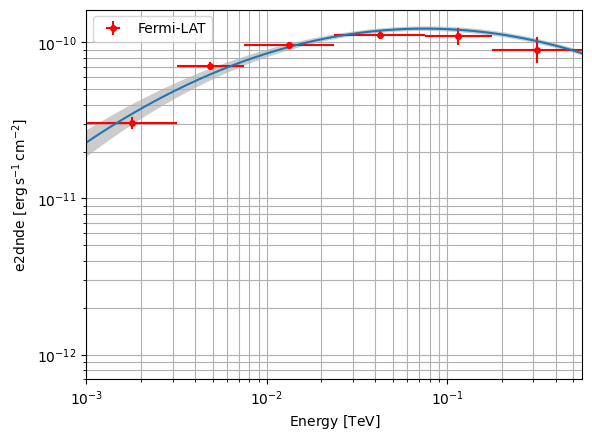

In [45]:
analysis.flux_points[0].plot(sed_type="e2dnde", color="red", label="Fermi-LAT")
analysis.datasets[0].models[config_main.target.source_name].spectral_model.plot(
    sed_type="e2dnde", energy_bounds=[70 * u.MeV,10 * u.TeV]
)
analysis.datasets[0].models[config_main.target.source_name].spectral_model.plot_error(
    sed_type="e2dnde", energy_bounds=[70 * u.MeV,10 * u.TeV]
)

plt.grid(which="both")
plt.legend()

In [46]:
hess_fpt = analysis.flux_points[1].to_table(sed_type="e2dnde", formatted=True)
hess_fpt

e_ref,e_min,e_max,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,is_ul,counts,success,norm_scan,stat_scan
TeV,TeV,TeV,TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[1],float32[1],float64,bool,float64[1],bool,float64[11],float64[11]
0.126,0.100,0.158,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.000,False,0.0,False,0.200 .. 5.000,nan .. nan
0.200,0.158,0.251,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.000,False,0.0,False,0.200 .. 5.000,nan .. nan
0.316,0.251,0.398,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.000,False,0.0,False,0.200 .. 5.000,nan .. nan
0.501,0.398,0.631,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.000,False,0.0,False,0.200 .. 5.000,nan .. nan
0.794,0.631,1.000,5.558e-11,4.623e-12,4.701e-12,4.551e-12,6.517e-11,163.720,12.795,217.9272507989022,188.91757,0.000,False,218.0,True,0.200 .. 5.000,117.350 .. 612.590
1.259,1.000,1.585,3.664e-11,3.912e-12,4.022e-12,3.808e-12,4.491e-11,105.412,10.267,106.99867788947674,99.99859,0.000,False,107.0,True,0.200 .. 5.000,70.619 .. 481.661
1.995,1.585,2.512,3.037e-11,4.152e-12,4.270e-12,4.043e-12,3.916e-11,60.827,7.799,79.02028293629816,69.02285,0.000,False,79.0,True,0.200 .. 5.000,41.252 .. 288.215
3.162,2.512,3.981,2.149e-11,3.948e-12,4.089e-12,3.825e-12,2.997e-11,33.206,5.762,47.00093676770746,40.001076,0.000,False,47.0,True,0.200 .. 5.000,21.854 .. 181.516


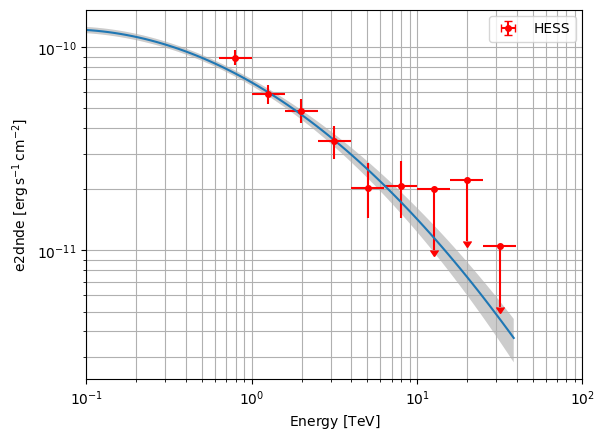

In [47]:
analysis.flux_points[1].plot(sed_type="e2dnde", color="red", label="HESS")
analysis.datasets[1].models[0].spectral_model.plot(
    sed_type="e2dnde", energy_bounds=[10 * u.GeV, 40 * u.TeV]
)
analysis.datasets[1].models[0].spectral_model.plot_error(
    sed_type="e2dnde", energy_bounds=[10 * u.GeV, 40 * u.TeV]
)

plt.grid(which="both")
plt.legend()

In [48]:
magic_fpt = analysis.flux_points[2].to_table(sed_type="e2dnde", formatted=True)
magic_fpt

e_ref,e_min,e_max,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,is_ul,counts,success,norm_scan,stat_scan
TeV,TeV,TeV,TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[1],float32[1],float64,bool,float64[1],bool,float64[11],float64[11]
0.098,0.078,0.122,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.000,False,0.0,False,0.200 .. 5.000,nan .. nan
0.153,0.122,0.191,6.379e-11,6.205e-12,6.332e-12,6.081e-12,7.671e-11,166.102,12.888,202.00329075974435,152.00356,0.000,False,202.0,True,0.200 .. 5.000,89.538 .. 817.629
0.239,0.191,0.299,6.527e-11,6.027e-12,6.186e-12,5.872e-12,7.797e-11,233.958,15.296,146.98039411993855,133.31313,0.000,False,147.0,True,0.200 .. 5.000,129.716 .. 655.401
0.374,0.299,0.468,7.190e-11,6.767e-12,6.960e-12,6.578e-12,8.622e-11,244.148,15.625,129.98972323995142,122.32285,0.000,False,130.0,True,0.200 .. 5.000,152.457 .. 424.661
0.585,0.468,0.731,4.386e-11,5.876e-12,6.132e-12,5.624e-12,5.664e-11,138.613,11.773,58.01611061865924,57.016205,0.000,False,58.0,True,0.200 .. 5.000,67.082 .. 361.501
0.914,0.731,1.143,5.571e-11,7.767e-12,8.113e-12,7.436e-12,7.266e-11,119.293,10.922,55.976964206947144,53.97669,0.000,False,56.0,True,0.200 .. 5.000,77.355 .. 164.683
1.430,1.143,1.788,2.858e-11,6.354e-12,6.818e-12,5.904e-12,4.317e-11,50.664,7.118,21.008982415342484,20.675697,0.000,False,21.0,True,0.200 .. 5.000,23.910 .. 136.553
2.236,1.788,2.796,2.943e-11,7.603e-12,8.282e-12,6.972e-12,4.744e-11,41.589,6.449,14.974778931827528,14.974779,0.000,False,15.0,True,0.200 .. 5.000,25.007 .. 62.362


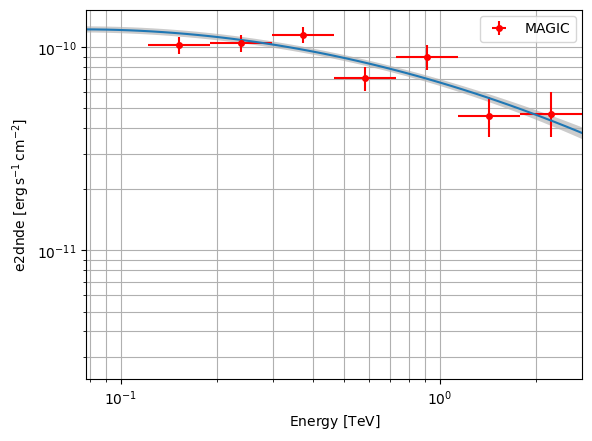

In [49]:
analysis.flux_points[2].plot(sed_type="e2dnde", color="red", label="MAGIC")
analysis.datasets[2].models[0].spectral_model.plot(
    sed_type="e2dnde", energy_bounds=[10 * u.GeV, 40 * u.TeV]
)
analysis.datasets[2].models[0].spectral_model.plot_error(
    sed_type="e2dnde", energy_bounds=[10 * u.GeV, 40 * u.TeV]
)

plt.grid(which="both")
plt.legend()

# Final SED plot with all instruments

(0.0007, 50.0)

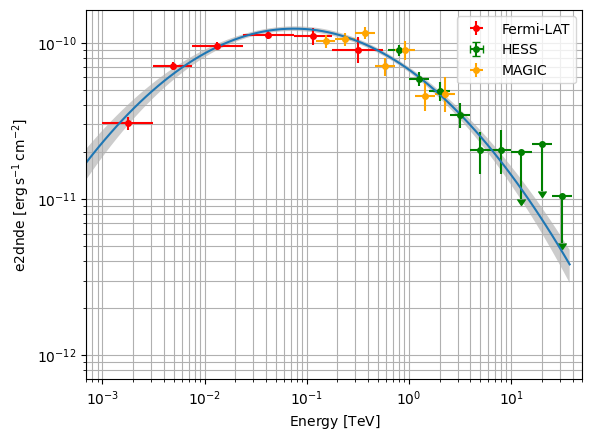

In [50]:
analysis.flux_points[0].plot(sed_type="e2dnde", color="red", label="Fermi-LAT")
analysis.flux_points[1].plot(sed_type="e2dnde", color="green", label="HESS")
analysis.flux_points[2].plot(sed_type="e2dnde", color="orange", label="MAGIC")

analysis.datasets[1].models[0].spectral_model.plot(
    sed_type="e2dnde", energy_bounds=[70 * u.MeV, 40 * u.TeV]
)
analysis.datasets[1].models[0].spectral_model.plot_error(
    sed_type="e2dnde", energy_bounds=[70 * u.MeV, 40 * u.TeV]
)

plt.grid(which="both")
plt.legend()
plt.xlim(7e-4, 5e1)